In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('stockmarket.csv')
pd.set_option('display.max_columns',None)

In [3]:
df

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0
...,...,...,...,...,...,...,...
4078,2021-07-26,2110.0000,2121.6001,2071.7000,2077.7000,378150.0,0.0
4079,2021-07-27,2079.0000,2083.5000,2041.2000,2054.3000,271432.0,0.0
4080,2021-07-28,2060.1001,2060.1499,2016.6000,2036.8500,207230.0,0.0
4081,2021-07-29,2050.0000,2074.3999,2043.7500,2055.2500,142646.0,0.0


In [4]:
df.dtypes

date                object
open               float64
high               float64
low                float64
close              float64
volume             float64
dividend_amount    float64
dtype: object

In [5]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

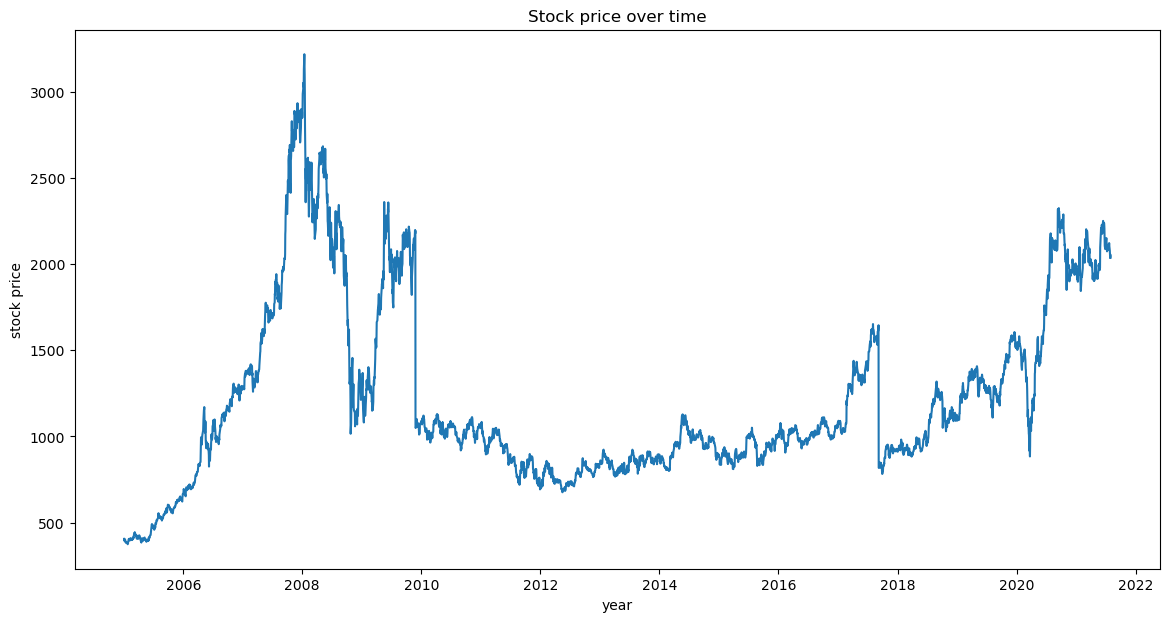

In [11]:
plt.figure(figsize=(14,7))
plt.plot(df['close'])
plt.title("Stock price over time")
plt.ylabel("stock price")
plt.xlabel("year")
plt.show()

In [12]:
df['20']=df['close'].rolling(window=20).mean()
df['80']=df['close'].rolling(window=80).mean()

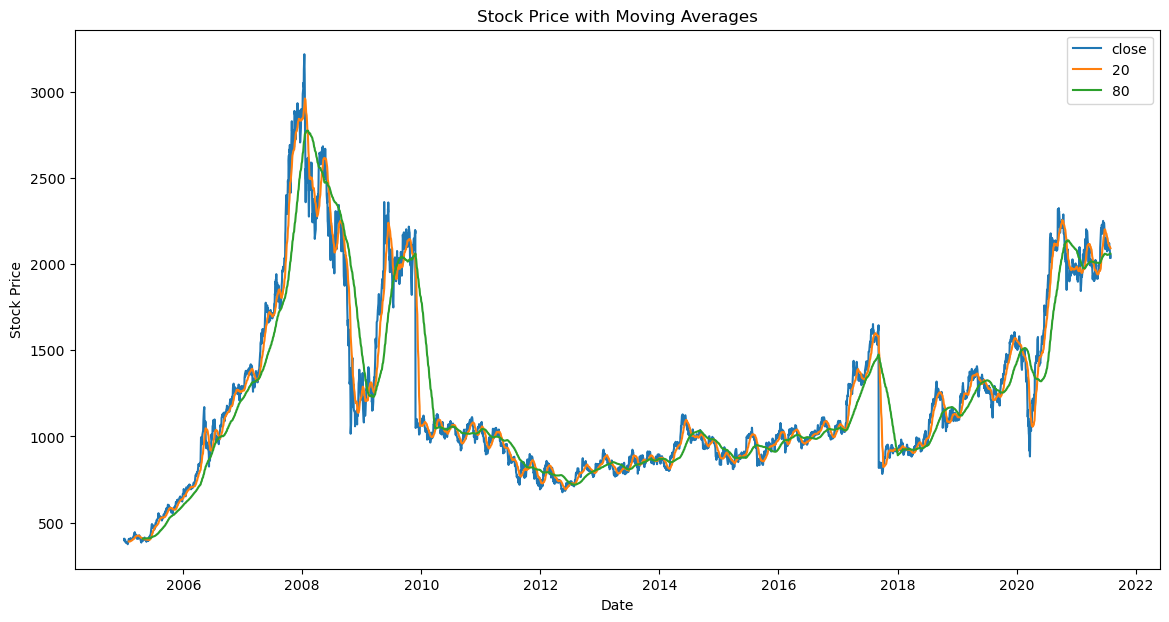

In [17]:
plt.figure(figsize=(14,7))
plt.plot(df['close'],label='close')
plt.plot(df['20'],label='20')
plt.plot(df['80'],label='80')
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [22]:
df.shape

(4083, 8)

<Axes: >

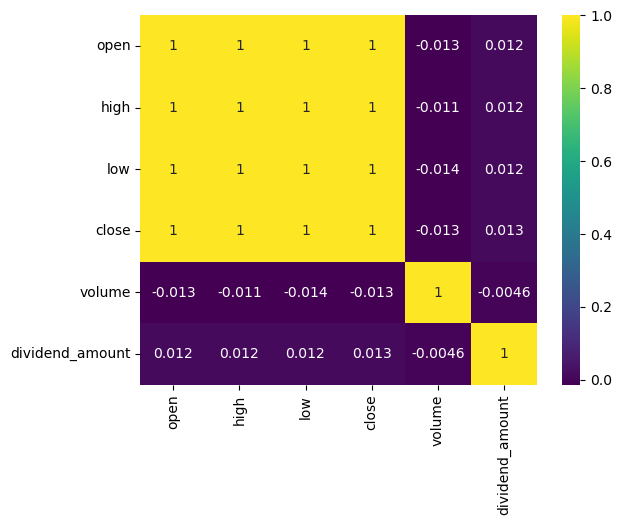

In [25]:
correlation=df[['open','high','low','close','volume','dividend_amount']].corr()
sns.heatmap(correlation,annot=True,cmap='viridis')

In [26]:
weekly=df['close'].resample('W').mean()
monthly=df['close'].resample('M').mean()
yearly=df['close'].resample('Y').mean()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12452\157268575.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly=df['close'].resample('M').mean()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12452\157268575.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly=df['close'].resample('Y').mean()


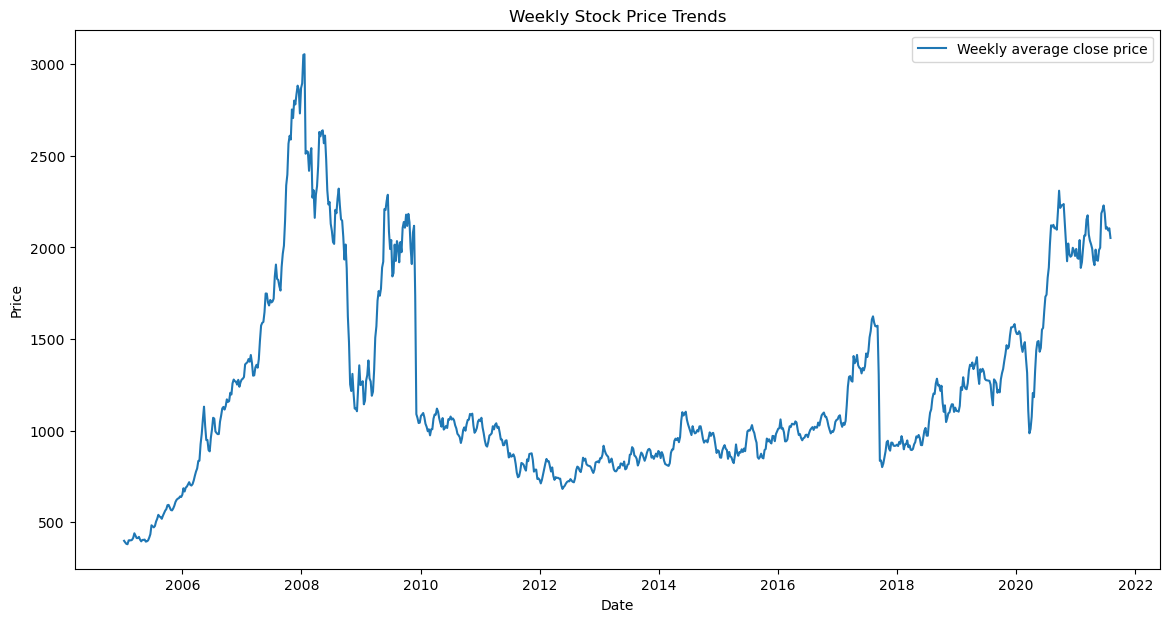

In [28]:
plt.figure(figsize=(14,7))
plt.plot(weekly,label="Weekly average close price")
plt.title('Weekly Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

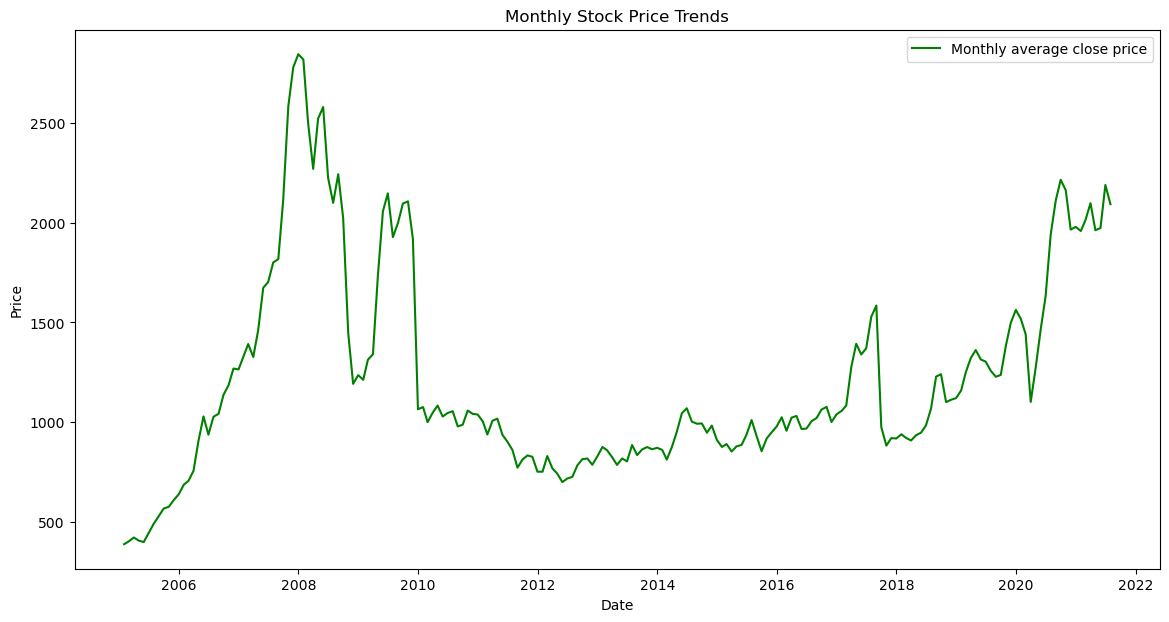

In [30]:
plt.figure(figsize=(14,7))
plt.plot(monthly,label="Monthly average close price",color='g')
plt.title('Monthly Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

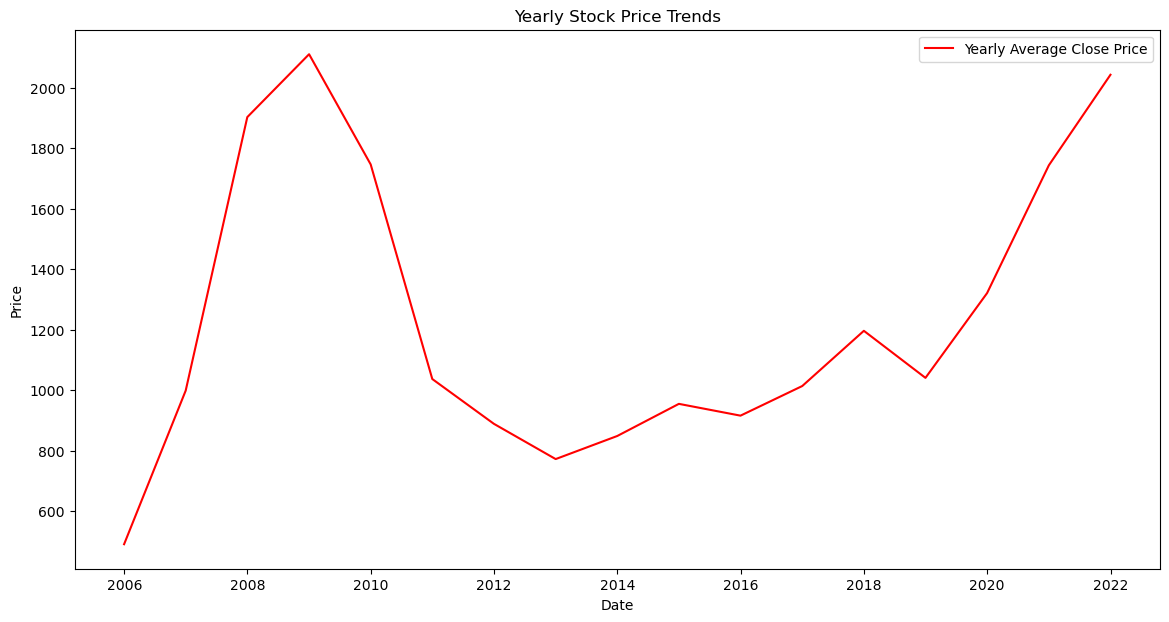

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(yearly, label='Yearly Average Close Price', color='r')
plt.title('Yearly Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
data=df['close']

model=ARIMA(data,order=(1,1,1))
modelfit=model.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
pd.set_option("display.max_rows",None)

In [37]:
next100days=modelfit.forecast(100,alpha=0.05)
next100days

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\New folder\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


4083    2034.671083
4084    2034.650528
4085    2034.649948
4086    2034.649932
4087    2034.649931
4088    2034.649931
4089    2034.649931
4090    2034.649931
4091    2034.649931
4092    2034.649931
4093    2034.649931
4094    2034.649931
4095    2034.649931
4096    2034.649931
4097    2034.649931
4098    2034.649931
4099    2034.649931
4100    2034.649931
4101    2034.649931
4102    2034.649931
4103    2034.649931
4104    2034.649931
4105    2034.649931
4106    2034.649931
4107    2034.649931
4108    2034.649931
4109    2034.649931
4110    2034.649931
4111    2034.649931
4112    2034.649931
4113    2034.649931
4114    2034.649931
4115    2034.649931
4116    2034.649931
4117    2034.649931
4118    2034.649931
4119    2034.649931
4120    2034.649931
4121    2034.649931
4122    2034.649931
4123    2034.649931
4124    2034.649931
4125    2034.649931
4126    2034.649931
4127    2034.649931
4128    2034.649931
4129    2034.649931
4130    2034.649931
4131    2034.649931
4132    2034.649931
